<a href="https://colab.research.google.com/github/tfindiamooc/mlp/blob/feature/TextAnalysisClass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text classification with Logistic Regression

Welcome to Lesson #3! In the last two lessons, you learned how to preprocess and vectorize text data. Now, it's time to build text classifiers!

In this lesson, we'll:

*   Build **pipelines** for text classification using **Logistic Regression**.
*   Learn how to **inspect** the model to understand how it works.
*   Use **GridSearchCV** to **tune hyperparameters** and improve model performance.

Let's start by building basic pipelines for Logistic Regression!

In [ ]:
# import libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

## Load Dataset

In [ ]:
# 1. Load Dataset
newsgroups = fetch_20newsgroups(
    subset='all',
    categories=['alt.atheism', 'soc.religion.christian'])
X, y = newsgroups.data, newsgroups.target
target_names = newsgroups.target_names

**Load dataset**: We are using the `fetch_20newsgroups` dataset, focusing on the 'alt.atheism' and 'soc.religion.christian' categories.

## Train-test split

In [ ]:
# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Split data:** We split the data into training and test sets.  We are setting aside 30% exampels for test.

In [ ]:
# 3. Create Logistic Regression Pipeline
logreg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('logreg', LogisticRegression(max_iter=1000))
])

Let's understand the Logistic Regression pipeline code:
*   `TfidfVectorizer`:  We use TF-IDF to vectorize the text data, just like in the previous lesson.
*   `LogisticRegression`: This is the classification model. Logistic Regression is a linear model that's effective for binary and multi-class classification.


## Model training

In [ ]:
# 4. Train Pipeline
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('logreg', LogisticRegression(max_iter=1000))])

**Train Pipeline:** `logreg_pipeline.fit(X_train, y_train)` trains the entire pipeline on the training data. This means the `TfidfVectorizer` learns the vocabulary and TF-IDF weights, and the `LogisticRegression` model learns to classify based on these features.

## Prediction

In [ ]:
# 5. Make Predictions
y_pred_logreg_pipeline = logreg_pipeline.predict(X_test)

**Make Predictions:** Using the trained pipeline to make predictions on the test set.  

> The pipeline automatically preprocesses the test data using the learned `TfidfVectorizer` and then feeds it to the trained `LogisticRegression` model.

## Performance evaluation

In [ ]:
# 6. Evaluate Performance
print("Logistic Regression Pipeline Classification Report:")
print(classification_report(y_test, y_pred_logreg_pipeline, target_names=target_names))

Logistic Regression Pipeline Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.99      0.94      0.96       235
soc.religion.christian       0.96      0.99      0.97       304

              accuracy                           0.97       539
             macro avg       0.97      0.97      0.97       539
          weighted avg       0.97      0.97      0.97       539



**Evaluate Performance:** `classification_report` gives us key metrics like precision, recall, F1-score, and accuracy to evaluate how well our model is performing.

## Model inspection

In [ ]:
# 5. Model Inspection - Logistic Regression Feature Coefficients
feature_names = logreg_pipeline.named_steps['tfidf'].get_feature_names_out() # Get feature names from TF-IDF vectorizer
logreg_coefficients = logreg_pipeline.named_steps['logreg'].coef_[0] # Get coefficients from Logistic Regression model

# Sort coefficients and feature names by absolute coefficient value
feature_importance = sorted(zip(feature_names, logreg_coefficients), key=lambda x: abs(x[1]), reverse=True)

print("\nTop 20 Features (Words) for Logistic Regression (Sorted by Importance):")
for feature, coef in feature_importance[:20]: # Show top 20 features
    print(f"{feature}: {feature}: {coef:.2f}")


Top 20 Features (Words) for Logistic Regression (Sorted by Importance):
nntp: nntp: -2.20
host: host: -2.17
posting: posting: -2.16
keith: keith: -2.12
rutgers: rutgers: 2.10
christians: christians: 1.94
church: church: 1.88
atheism: atheism: -1.85
christ: christ: 1.74
athos: athos: 1.65
sin: sin: 1.64
edu: edu: -1.53
mathew: mathew: -1.52
1993: 1993: 1.50
atheists: atheists: -1.46
morality: morality: -1.38
christian: christian: 1.37
sandvik: sandvik: -1.32
caltech: caltech: -1.28
cs: cs: -1.23


*   **`feature_names = logreg_pipeline.named_steps['tfidf'].get_feature_names_out()`**:  This line gets the **vocabulary** (list of words) learned by the `TfidfVectorizer` in our pipeline.  `logreg_pipeline.named_steps['tfidf']` accesses the 'tfidf' step of the pipeline, and `.get_feature_names_out()` gets the feature names.
*   **`logreg_coefficients = logreg_pipeline.named_steps['logreg'].coef_[0]`**: This gets the **coefficients** learned by the `LogisticRegression` model.  `logreg_pipeline.named_steps['logreg']` accesses the 'logreg' step, and `.coef_[0]` extracts the coefficients for the first class (in binary classification).

**What are Feature Coefficients in Logistic Regression?**

*   In Logistic Regression, each word (feature) gets a **coefficient**.
*   **The magnitude (absolute value) of the coefficient indicates how important that word is for the classification.** Larger magnitude means more important.
*   **The sign (positive or negative) indicates the direction of the word's influence:**
    *   **Positive coefficient:**  The word pushes the prediction towards **class 1** (in our case, 'soc.religion.christian').
    *   **Negative coefficient:** The word pushes the prediction towards **class 0** ('alt.atheism').

The code then **sorts the features by the absolute value of their coefficients** to find the most important words.  It prints the top 20 words and (optionally) visualizes the top 10 with a bar plot.



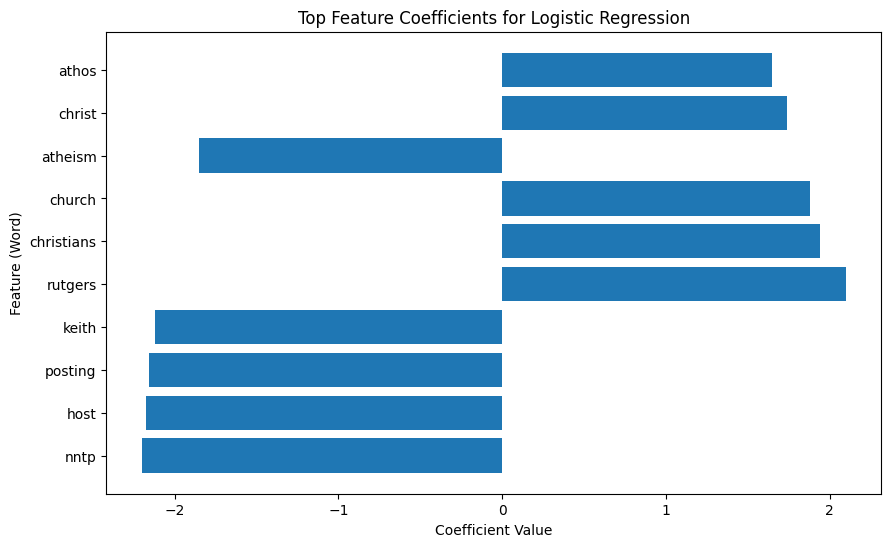

In [ ]:
# (Optional) Visualization - Bar plot of top features
import matplotlib.pyplot as plt

top_n = 10 # Visualize top 10 features
top_feature_names = [f[0] for f in feature_importance[:top_n]]
top_coefficients = [f[1] for f in feature_importance[:top_n]]

plt.figure(figsize=(10, 6))
plt.barh(top_feature_names[::-1], top_coefficients[::-1])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature (Word)")
plt.title("Top Feature Coefficients for Logistic Regression")
plt.gca().invert_yaxis() # Invert y-axis for better readability
plt.show()

Run the code and examine the "Top 20 Features" output and the bar plot. Do the top words make sense for distinguishing between 'alt.atheism' and 'soc.religion.christian' articles?

## Hyperparameter Tuning and GridSearchCV

So far, we've used models with their **default hyperparameter settings**.  But default settings are rarely optimal for a specific task. **Hyperparameter tuning** is the process of finding the best hyperparameter values for your model to maximize its performance.

**What are Hyperparameters?**

*   Hyperparameters are settings of a machine learning model that are **not learned from the data** during training. They are set *before* training.
*   Examples of hyperparameters we might tune:
    *   In `TfidfVectorizer`: `ngram_range`, `max_df`, `max_features`
    *   In `LogisticRegression`: `C`, `penalty`, `solver`

**Why Tune Hyperparameters?**

*   To **improve model performance** (accuracy, F1-score, etc.) on your specific task and dataset.
*   Default hyperparameters are general-purpose and might not be the best for your particular problem.

**GridSearchCV for Hyperparameter Tuning**

We'll use **GridSearchCV** from scikit-learn to automate the hyperparameter tuning process.  GridSearchCV does the following:

1.  You define a **grid of hyperparameters** you want to try.
2.  GridSearchCV tries **every possible combination** of hyperparameters from the grid.
3.  For each combination, it performs **cross-validation** to estimate the model's performance.
4.  Finally, it selects the hyperparameter combination that gives the **best performance** based on the chosen evaluation metric (e.g., F1-score).

Let's see how to use GridSearchCV with our Logistic Regression pipeline!

In [ ]:
from sklearn.model_selection import GridSearchCV

# 3. Define Hyperparameter Grid for GridSearchCV
param_grid_logreg = {
    'tfidf__ngram_range': [(1, 1), (1, 2)], # Try unigrams and bigrams
    'tfidf__max_df': [0.9, 1.0], # Try different max_df values for TF-IDF
    'logreg__C': [0.1, 1, 10],   # Try different C values for Logistic Regression
    'logreg__penalty': ['l1', 'l2'], # Try L1 and L2 penalties
    'logreg__solver': ['liblinear'] # Solver compatible with L1 penalty
}

# 4. Set up GridSearchCV
grid_search_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='f1_macro', n_jobs=-1) # 5-fold CV, optimize F1-score, use all CPU cores

# 5. Run GridSearchCV (Fit on training data - this will take longer)
grid_search_logreg.fit(X_train, y_train) # Fit GridSearchCV - this performs cross-validation for each parameter combination

# 6. Get Best Model and Best Parameters from GridSearchCV
best_logreg_pipeline = grid_search_logreg.best_estimator_ # Best pipeline found by GridSearchCV
best_params_logreg = grid_search_logreg.best_params_ # Best parameter combination

print("Best Logistic Regression Pipeline Parameters from GridSearchCV:")
print(best_params_logreg)

# 7. Evaluate Best Model on Test Set
y_pred_best_logreg = best_logreg_pipeline.predict(X_test)
print("\nClassification Report for Best Logistic Regression Pipeline (on Test Set):")
print(classification_report(y_test, y_pred_best_logreg, target_names=target_names))

Best Logistic Regression Pipeline Parameters from GridSearchCV:
{'logreg__C': 10, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear', 'tfidf__max_df': 1.0, 'tfidf__ngram_range': (1, 2)}

Classification Report for Best Logistic Regression Pipeline (on Test Set):
                        precision    recall  f1-score   support

           alt.atheism       0.99      0.94      0.97       235
soc.religion.christian       0.96      0.99      0.98       304

              accuracy                           0.97       539
             macro avg       0.97      0.97      0.97       539
          weighted avg       0.97      0.97      0.97       539



Let's break down the GridSearchCV code for Logistic Regression:

*   **`from sklearn.model_selection import GridSearchCV`**: We import `GridSearchCV`.
*   **Step 3: Define Hyperparameter Grid:**
    *   `param_grid_logreg` is a dictionary that defines the **hyperparameter grid**.
    *   **Keys** of the dictionary are the **parameter names** in the pipeline steps.  Note the format: `step_name__parameter_name`.  For example, `tfidf__ngram_range` refers to the `ngram_range` parameter of the 'tfidf' step.
    *   **Values** are **lists of hyperparameter values** to try for each parameter.
    *   In this example, we are tuning:
        *   `tfidf__ngram_range`:  Trying unigrams `(1, 1)` and bigrams `(1, 2)`.
        *   `tfidf__max_df`: Trying `0.9` and `1.0` for TF-IDF.
        *   `logreg__C`: Trying `0.1`, `1`, and `10` for Logistic Regression regularization.
        *   `logreg__penalty`: Trying `l1` and `l2` penalties.
        *   `logreg__solver`: Setting the solver to `'liblinear'` because it's compatible with the `l1` penalty.
*   **Step 4: Set up GridSearchCV:**
    *   `GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='f1_macro', n_jobs=-1)` creates the GridSearchCV object.
        *   `logreg_pipeline`: The pipeline we want to tune.
        *   `param_grid_logreg`: The hyperparameter grid.
        *   `cv=5`:  Use **5-fold cross-validation**. This means for each hyperparameter combination, GridSearchCV will split the training data into 5 parts, train on 4 parts, and evaluate on the 1 held-out part, and repeat this 5 times to get a more robust performance estimate.
        *   `scoring='f1_macro'`:  Use **macro-averaged F1-score** as the metric to optimize. GridSearchCV will try to find the hyperparameters that maximize this score.
        *   `n_jobs=-1`: Use **all available CPU cores** to speed up the search.
*   **Step 5: Run GridSearchCV:**
    *   `grid_search_logreg.fit(X_train, y_train)`: **This is the computationally intensive step!** GridSearchCV will train and evaluate the pipeline for *every combination* of hyperparameters in `param_grid_logreg` using cross-validation. This can take a while, especially with a larger grid.
*   **Step 6: Get Best Model and Parameters:**
    *   `grid_search_logreg.best_estimator_`:  This gives you the **best pipeline** found by GridSearchCV – the pipeline that was trained with the hyperparameter combination that achieved the best cross-validation score.
    *   `grid_search_logreg.best_params_`: This gives you the **dictionary of best hyperparameters** that GridSearchCV found.
    *   We print the `best_params_logreg` to see the optimal settings.
*   **Step 7: Evaluate Best Model:**
    *   We evaluate `best_logreg_pipeline` on the **test set** to get a final estimate of the tuned model's performance on unseen data.

Run the Logistic Regression GridSearchCV code.  It will take longer to run than the basic pipelines because it's doing cross-validation for multiple hyperparameter combinations.  Examine the "Best Parameters" and the "Classification Report for Best Logistic Regression Pipeline".  Did hyperparameter tuning improve the performance compared to the basic Logistic Regression pipeline?

### Experimentation and Deeper Dive

Now it's your turn to experiment and explore further! Try these:

1.  **Dataset Variation with Inspection and Tuning:**
    *   Change the `categories` in `fetch_20newsgroups` to other pairs of categories (e.g., `['comp.graphics', 'rec.graphics']`, `['talk.politics.mideast', 'talk.politics.misc']`).
    *   For each category pair:
        *   Run GridSearchCV for **Logistic Regression**.
        *   Compare the **best performance** (F1-score) achieved by each model after tuning. Which model works better for different datasets?
        *   Inspect the **top features** of the **best Logistic Regression** model (using the inspection code from earlier) for different datasets. Do the top features make sense for the topics? Do different datasets lead to different important words?

2.  **Vectorization Hyperparameter Tuning:**
    *   Modify `param_grid_logreg` to also tune `tfidf__max_features`.  For example, add ` 'tfidf__max_features': [1000, 5000, 10000]` to the parameter grids.
    *   Does tuning `max_features` improve performance? What is the trade-off between `max_features` and training time?

3.  **N-gram Range Tuning:**
    *   Experiment with a wider range of `ngram_range` values in `param_grid_logreg`. For example, try `ngram_range` values like `[(1, 1), (1, 2), (2, 2), (1, 3)]`.
    *   Does using trigrams (or only bigrams) improve performance for any of the models?

4.  **Model-Specific Hyperparameter Tuning:**
    *   Explore other hyperparameters for `LogisticRegression` (e.g., different `solver` values). You can look at the `scikit-learn` documentation for these models to see what other hyperparameters are available.

Think about these questions as you experiment:

*   Does hyperparameter tuning consistently improve model performance?
*   Which hyperparameters seem to be most important to tune for text classification?
*   Do the best hyperparameters vary depending on the dataset or the model?

After your experiments, read the "Deeper Dive" section below to understand some important concepts related to model inspection and hyperparameter tuning.

### Deeper Dive - Model Inspection and Hyperparameter Tuning Concepts

Let's discuss some important concepts related to model inspection and hyperparameter tuning:

*   **Interpretability vs. Performance Trade-off:**
    *   Often, there's a trade-off between **model interpretability** and **performance**.
    *   Simpler models like **Logistic Regression** and **Naive Bayes** are generally more **interpretable**. You can easily inspect feature coefficients or probabilities to understand how they make decisions.
    *   More complex models, especially after hyperparameter tuning (like tuned SVMs or Neural Networks, which we'll see later), might achieve **higher performance** but can be **less directly interpretable**. They can be more like "black boxes."
    *   The right balance between interpretability and performance depends on your specific application. If understanding *why* a model makes a decision is crucial (e.g., in some sensitive domains), you might prefer a more interpretable model, even if it's slightly less accurate.  If pure performance is the primary goal, you might choose a more complex, less interpretable model.

*   **Importance of Cross-Validation in Hyperparameter Tuning:**
    *   **GridSearchCV uses cross-validation** to estimate the performance of different hyperparameter settings. This is *essential* for reliable hyperparameter tuning.
    *   **Why is cross-validation important?**  If we just tuned hyperparameters on the *training set* and then evaluated on the *test set*, we might overfit to the training data *during the tuning process itself*. We want to find hyperparameters that generalize well to *unseen data*.
    *   Cross-validation gives us a more robust estimate of how well a model with a particular hyperparameter setting will perform on average on unseen data.

*   **Computational Cost of Hyperparameter Tuning:**
    *   Hyperparameter tuning with GridSearchCV can be **computationally expensive**.
    *   GridSearchCV tries *every combination* of hyperparameters in your `param_grid`. For each combination, it performs cross-validation (e.g., 5-fold CV means training and evaluating the model 5 times).
    *   As you increase the size of your hyperparameter grid (more parameters to tune, more values to try for each parameter), the training time for GridSearchCV increases significantly.
    *   Be mindful of training time, especially with larger datasets and more complex models.  For very large hyperparameter spaces, consider using **RandomizedSearchCV**, which randomly samples hyperparameter combinations instead of trying all of them (we won't cover RandomizedSearchCV in detail in this lesson, but it's good to be aware of it).

### Summary and Next Steps

Excellent work! In this lesson, you've significantly leveled up your text classification skills. You learned how to:

*   Build **pipelines** for Logistic Regression.
*   **Inspect** Logistic Regression model to understand feature importance.
*   Use **GridSearchCV** to perform **hyperparameter tuning** and improve model performance.

**Key Takeaways:**

*   Model inspection helps you understand *why* your models make predictions and gain insights from your text data.
*   Hyperparameter tuning is crucial for optimizing model performance for your specific task.
*   GridSearchCV automates the hyperparameter search process using cross-validation.
*   There's often a trade-off between model interpretability and performance.
*   Cross-validation is essential for reliable hyperparameter tuning and prevents overfitting during the tuning process.

**Next Steps:**

In the next lessons, we'll continue to expand our text classification toolkit! We'll explore:

*   **Ensemble methods** like **Random Forest** to further improve performance.
*   **Neural Networks** for text classification, starting with **Feedforward Neural Networks**.

You're building a strong foundation in text classification! Keep experimenting and practicing!

### Key Takeaways for Lesson #3 (for students):

*   **Pipelines** are essential for organizing text classification workflows in scikit-learn.
*   **Logistic Regression** is an effective model for text classification.
*   **Model inspection** techniques (feature coefficients, log-probabilities) help understand model behavior.
*   **GridSearchCV** automates **hyperparameter tuning** to improve model performance.
*   **Cross-validation** is crucial for reliable hyperparameter tuning.
*   Experimentation is key to finding the best models and hyperparameters for your text classification tasks.

### Resources for Lesson #3:

*   **Scikit-learn documentation on `Pipeline`:** [https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
*   **Scikit-learn documentation on `LogisticRegression`:** [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
*   **Scikit-learn documentation on `classification_report`:** [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
*   **Scikit-learn documentation on `GridSearchCV`:** [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Additional Notes:

*   **More Hyperparameters:**  The hyperparameter grids we used in GridSearchCV are just examples. You can (and should!) experiment with a wider range of hyperparameter values to potentially find even better settings.  Look at the scikit-learn documentation for each model and vectorizer to see all available hyperparameters.

*   **Other Evaluation Metrics:** We used `f1_macro` as the scoring metric in GridSearchCV.  You can try other metrics as well (e.g., `accuracy`, `precision_macro`, `recall_macro`, `f1_weighted`) depending on what you want to optimize for in your specific task.

*   **RandomizedSearchCV:** As mentioned in the "Deeper Dive" section, for very large hyperparameter grids, `RandomizedSearchCV` can be a more efficient alternative to `GridSearchCV`.  It samples hyperparameter combinations randomly, which can be faster than trying all combinations, especially when many hyperparameters are not very important.

*   **Model Choice:** We covered Logistic Regression.  The "best" model depends on your data and task.  Experimentation and comparison are key!  In the next lessons, we'll add more models to your toolkit.